# **Week 3** 

### **QUICK SORT**

**Shortcomings of merge sort**
- Merge needs to create a new list to hold the merged elements
  - No obvious way to efficiently merge two lists in place
  - Extra storage can be costly
- Inherently recursive
  - Recursive calls and returns are expensive
- Merging happens because elements in the left half need to move to the right half and vice versa
  - Consider an input of the form `[0,2,4,6,1,3,5,9]`
- Can we divide the list so that everything on the right?
  - No need to merge!

**Divide and conquer without merging**
- Suppose the median `L` is *m*
- Move all values $\le$ *m* to left half of `L`
  - Right half has values > *m*
- Recursively sort left and right halves
  - `L` is now sorted, no merge!
- Recurrence: `T(n) = 2T(n/2) - n`
  - Rearrange in a single pass, time `O(n)`
- So `T(n)` is `O(nlogn)`


- How do we find the median?
  - Sort and pick up the middle element
  - But our aim is to sort the list!
- Instead pick some value in `L` - pivot
  - Split `L` with respect to the pivot element
  

**Quicksort [C.A.R Hoare]**
- Choose a pivot element
  - Typically the first element in the array
- Partition `L` into lower and upper parts with respect to the pivot
- Move the pivot between the lower and upper partition
- Recursively sort the two partitions


High level view of quicksort
- Input list
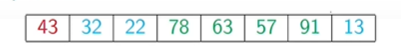
  - Identify pivot
  - Mark lower elements and upper elements
- Rearrange the elements as lower-pivot-upper
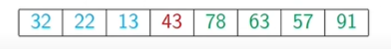
- Recursively sort the lower and upper partitions

**Partitioning**
- Scan the list from left to right
- Four segments: `Pivot`, `Lower`, `Upper`, `Unclassified`
- Examine the first unclassified element
  - If it is larger than the pivot, extend `Upper` to include this element
  - If it is less than or equal to the pivot, exchange with the first element in `Upper`. This extends `Lower` and shifts `Upper` by one position.


- `Pivot` is always the first element
- Maintain two indices to mark the end of the `Lower` and `Upper` segments
- After partitioning, exchange the pivot with the last element of the `Lower` segment.

In [ ]:
def quicksort(L, l, r): # Sort L[l:r]
  if (r - l <= 1):
    return L
  (pivot, lower, upper) = (L[l], l + 1, l + 1)
  for i in range(l+1,r):
    if L[i] > pivot: # Extend upper segment
      upper = upper + 1
    else: # Exchange L[i] with start of upper segment
      (L[i], L[lower]) = (L[lower], L[i])
      # Shift both segments
      (lower, upper) = (lower + 1, upper + 1)
    # Move pivot between lower and upper
    (L[i], L[lower-1]) = (L[lower-1], L[l])
    lower = lower - 1
    # Recursive calls
    quicksort(L,l,lower)
    quicksort(L, lower+1,upper)
    return L

 **Summary**
- Quicksort uses divide and conquer, like merge sort.
- By partitioning the list carefully, we avoid a merge step
    - This allows an in place sort
- We can also provide an iterative implementation to avoid the cost of recursive calls
- The partitioning strategy described is not the only one used in the literature
  - Can build the lower and upper segments from opposite ends and meet in the middle
- Need to analyze the complexity of quicksort

### **ANALYSIS OF QUICK SORT**

**Analysis**
- Partitioning wrt the pivot takes time `O(n)`
- If the pivot is the median 
  - `T(n)` = `2T(n/2)` + `n`
  - `T(n)` is `O(nlogn)`
- Worst case? Pivot is maximum or minimum
  - Partitions are of size 0, n - 1
  - `T(n)` = `T(n - 1)` + `n`
  - `T(n)` = `n` + `(n - 1)` + ... + 1
  - `T(n)` is O($n^2$)
- Already sorted array, worst case!

- However, average case is `O(nlogn)`
- Sorting is a rare situation where we can compute this
  - Values don't matter, only relative order is important
  - Analyze behaviour over permutations of `{1,2,...,n}`
  - Each input permutation is equally likely
- Expected running time is `O(nlogn)`

**Randomizaton**
- Any fixed choice of pivot allows us to construct worst case input
- Instead, choose pivot position randomly at each step
- Expected run time is again `O(nlogn)`


**Iterative quicksort**
- Recursive calls work on disjoint segments
  - No recombination of results is required
- Can explicitly keep track of left and right endpoints of each segment to be sorted.

**Quicksort in practice**
- In practice, quicksort is very fast
- Very often the default algorithm used for in-built sort functions
  - Sorting a column in a spreadsheet
  - Library sort function in a programming language
  

**Summary**
- The worst case complexity of quicksort is O($n^2$)
- However, the average case is `O(nlogn)`
- Randomly choosing the pivot is a good strategy to beat worst case inputs
- Quicksort works in-place and can be impleted iteratively
- Very fast in practice, and often used for built-in sorting functions
  - Good example of a situation when the worst case upper bound is pessimistic

### **CONCLUDING REMARKS ON SORTING ALGORITHMS**

**Stable Sorting**
- Often list values are tuples
  - Rows from a table, with multiple columns / attributes
  - A list of students, each student entry has a roll number, names, marks, ... 
- Suppose students have already been sorted by roll number 
- If we now sort by name, will all students with the same name remain in sorted order with respect to roll number?
- `Stability` of sorting is crucial in many applications
- Sorting on column B should not disturb sorting on column A


- The quicksort implementation we described is not stable
  - Swapping values while partitioning can disturb existing sorted order
- Merge Sort is stable if we merge carefully
  - Do not allow elements from the right to overtake elements on the left
  - While merging, prefer the left list while breaking ties

**Other criteria**
- Minimizing data movement
  - Imagine each element is a heavy carton
  - Reduce the effort of moving values around
  

**Best sorting algorithm?**
- Quicksort is often the algorithm of choice, despite O($n^2$) worst case
- Merge sort is typically used for "external" sorting
  - Database tables taht are too large to store in memory all at once
  - Retrieve in parts from the disk and write back
- Other `O(nlogn)` algorithms exist - heapsort
- Sometimes hybrid strategies are used
  - Use divide and conquer for large *n*
  - Switch to insertion sort when *n* becomes small (e.g., n < 16)

### **DIFFERENCE BETWEEN LISTS AND ARRAYS**

**Sequences**
- Two basic ways of storing a seequence of values
  - Lists
  - Arrays
- Lists
  - Flexible length
  - Easy to modify the structure
  - Values are scattered in memory
- Arrays
  - Fixed size
  - Allocate a contigous block of memory
  - Supports random access

**Lists**
- Typically a sequence of nodes
- Each node contains a value and points to the next node in the sequence
  - "Linked" list
- Easy to modify
  - Inserting and deletion is easy via local "plumbing"
  - Flexible size
- Need to follow links to access `A[i]` 
  - Takes time `O(i)`

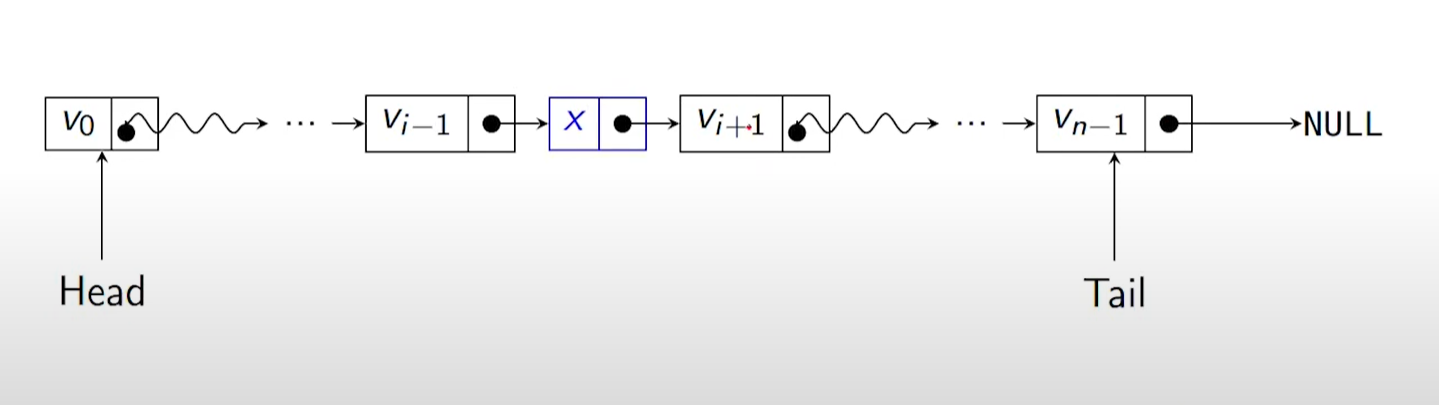


**Arrays**
- Fixed size, declared in advance
- Allocate a contiguous block of memory
  - *n* times the storage for a single value


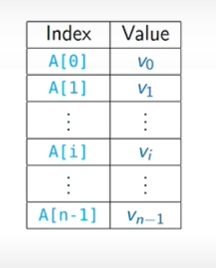

- "Random" access
  - Compute offset to `A[i]` from `A[0]`
  - Accessing `A[i]` takes constant time, independent of `i`
- Inserting and deleting elements is expensive
  - Expanding and contracting requires moving `O(n)` elements in the worst

**Operations**
- Exchange `A[i]` and `A[j]`
  - Constant time for arrays
  - `O(n)` for lists
- Delete `A[i]`, insert `v` after `A[i]`
  - Constant time for lists if we are already at `A[i]`
  - `O(n)` for arrays
- Need to keep implementation in mind when analyzing data structures
  - For instance, can we use binary search to insert in a sorted sequence?
  - Either search is slow, or insertion is slow, still `O(n)`

**Summary**
- Sequences can be stored as lists or arrays
- Lists are flexible but accessing an element is `O(n)`
- Arrays support random access but are difficult to expand, contract
- Algorithm analysis needs to take into account the underlying implementation.
- In Python:
  - Is the built-in type in Python really a "linked" list?
  - Numpy library provides arrays - are these faster than lists?

### **DESIGNING A FLEXIBLE LIST AND OPERATIONS ON THE SAME**

**Implementing lists in Python**
- Python class `Node`
- A list is a sequence of nodes
  - `self.value` is the stored value
  - `self.next` points in the next node
- Empty list?
  - `self.value` is `None`
- Creating lists
  - `l1` = `Node()` - empty list
  - `l2` = `Node(5)` - singleton list
  - `l1.isempty()` == `True`
  - `l2.isempty()` == `False`

In [ ]:
class Node:
  def __init__(self, v = None):
    self.value = v
    self.next = None
    return
  def isempty(self):
    if self.value == None:
      return True
    else:
      return False

**Appending to a list**
- Add `v` to the end of list `l`
- If `l` is empty, update `l.value` from `None`
- If at last value, `l.next` is `None`
  - Point `next` at new node with value `v`
- Otherwise, recursively append to rest of list


In [ ]:
def append(self, v):
  # append, recursive
  if self.isempty():
    self.value = v
  elif self.next == None:
    self.next = Node(v)
  else:
    self.next.append(v)
  return

- Iterative implementation
  - If empty, replace `l.value` by `v`
  - Loop through `l.next` to end of list
  - Add `v` to the end of the list

In [ ]:
def appendi(self, v):
  # append, iterative
  if self.isempty():
    self.value = v
    return
  
  temp = self
  while temp.next != None:
    temp = temp.next

  temp.next = Node(v)
  return


**Insert at the start of the list**
- Want to insert *v* at head
- Create a new node with *v*
- Cannot change where the head points!

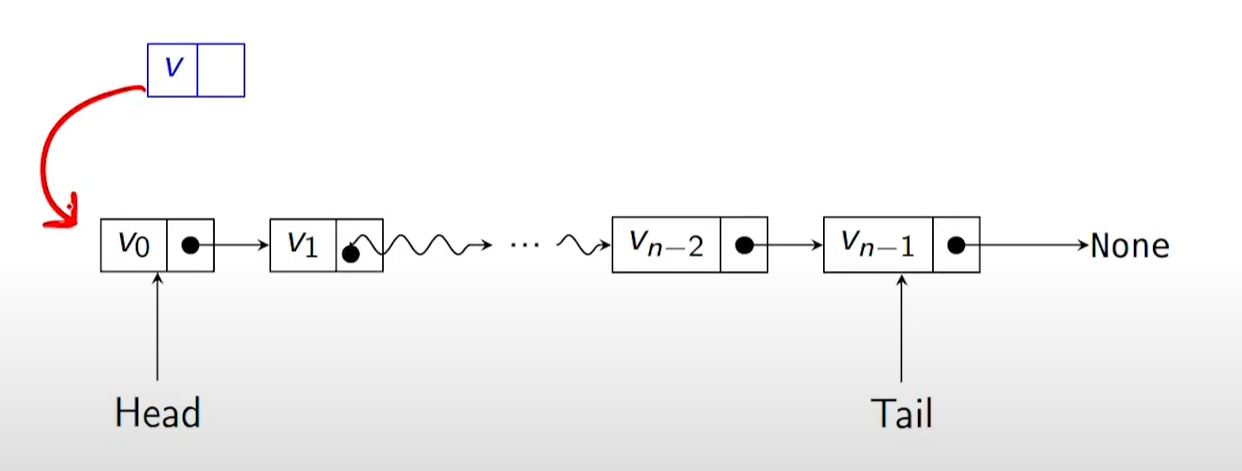

- Exchange the values $v_{0}$, $v$
- Make new node point to `head.next`
- Make `head.next` point to new node

In [ ]:
def insert(self, v):
  if self.isempty():
    self.value = v
    return
   
  newnode = Node(v)

  # Exchange values in self and newnode
  (self.value, newnode.value) = (newnode.value, self.value)

  # Switch links
  (self.next, newnode.next) = (newnode, self.next)

  return

**Delete a value *v***
- Remove first occurence of *v*
- Scan list for first *v* - look ahead at next node
- If next node value is *v*, bypass it
- Cannot bypass the first node in the list
  - Instead, copy the second node value to head
  - Bypass second node
- Recursive implementation


In [ ]:
def delete(self, v):
  # delete, recursive
  if self.isempty():
    return
  if self.value == v:
    self.value = None
    if self.next != None:
      self.value = self.next.value
      self.next = self.next.next
    return
  else:
    if self.next != None:
      self.next.delete(v):
      if self.next.value == None:
        self.next = None
  return


**Summary**
- Use a linked list of nodes to implement a flexible list
- Append is easy
- Insert requires some care, cannot change where the head points to
- When deleting, look one step ahead to bypass the node to be deleted

### **IMPLEMENTATION OF LISTS IN PYTHON**

**Lists in Python**
- Python lists are not implemented as flexible linked lists
- Underlying interpretation maps the list to an array
  - Assign a fixed block when you create a list
  - Double the size if the list overflows the array
- Keep track of the last position of the list in the array 
  - `l.append()` and `l.pop()` are constant time, amortised - `O(1)`
  - Insertion/deletion require time `O(n)`
- Effectively, Python lists behave more like arrays than lists



**Arrays v/s Lists in Python**
- Arrays are useful for representing matrices
- In list notation, these are nested lists \begin{pmatrix}
  0 & 1 \\ 0 & 1
 \end{pmatrix}
 that is `[[0,1], [1,0]]`
 - Need to be careful when initializing a multidimensional list 

In [ ]:
zerolist = [0,0,0]
zeromatrix = [zerolist, zerolist, zerolist]

zeromatrix[1][1] = 1
print(zeromatrix)

[[0, 1, 0], [0, 1, 0], [0, 1, 0]]


- Mutuability aliases different values
- Instead use list comprehension

In [ ]:
zeromatrix = [ [0 for i in range(3)] for j in range(3) ]

**Numpy Arrays**
- The Numpy library provides arrays as a basic type

In [ ]:
import numpy as np
zeromatrix = np.zeros(shape = (3,3))

- Can create an array from any sequence type

In [ ]:
newarray = np.array([[0,1],[1,0]])

- `arange` is the equivalent of `range` for lists

In [ ]:
row2 = np.arange(5)

- Can operate on amtrix as a whole
  - `C` = `3*A + B`
  - `C` = `np.matmul(A,B)` <br>
same as `C[i,j]` = `A[i.k].B[k,j]`
  - Very useful for data science

**Summary**
- Python lists are not implemented as flexible linked structures
- Instead, allocate an array and double space as needed
- Append is cheap, insert is expensive
- Arrays can be represented as multidimensional lists,but need to be careful about mutability, aliasing
- Numpy arrays are easier to use

### **IMPLEMENTATION OF DICTIONARY IN PYTHON**

**Dictionary**
- An array/list allows access through positional indices
- A dictionary allows access through arbitrary keys
  - A collection of key-value pairs
  - Random access - access time is the same for all keys


**Implementing a dictionary**
- The underlying storage is an array
  - Given an offset `i`, find `A[i]` in constant time
- Keys have to be mapped to `{0,1,..,n-1}`
  - Given an key `k`, convert it to an offset `i`
- Hash function
  - $h$ : $S$ -> $X$ maps a set of values $S$ to a small range of integers $X$ = `{0,1,...,n-1}`
  - Typically |$X$| << |$S$|, so there will be collisions, $h(s)$ = $h(s')$ , $s$ $\neq$ $s'$
  - A good hash function will minimize collisions
  - **SHA-256** is an industry standard hashing function whose range is 256 bits
    - Use to hash large files - avoid uploading to cloud storage

**Hash Table**
- An array `A` of size `n` combined with a hash function $h$
- $h$ maps keys to `{0,1,...,n-1}`
- Ideally, when we create an entry for key `k`, `A[h(k)]` will be unused
  - What if there is already a value at that location?
- Dealing with collisions
  - Open addressing (closed hashing)
    - Probe a sequence of alternate slots in the same array 
  - Open hashing
    - Each slot in the array points to a list of values
    - Insert into the list for the given slot
- Dictionary keys in Python must be immutable
  - If value changes, hash also changes!
  


**Summary**
- A dictionary is implemented as a hash table
  - An array plus a hash function
- Creating a good hash function is important 
- Need a strategy to deal with collisions
  - **Open addressing/closed hashing** - probe for free space in the array
  - **Open hashing** - each slot in the hash table points to a list of key-value pairs
  - many heuristics/optimizations possible for dea